In [1]:
# imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 

Using TensorFlow backend.


In [2]:
# Read data from csv file for training and validation data
TrainingSet = numpy.genfromtxt("./training.csv", delimiter=",", skip_header=True)
ValidationSet = numpy.genfromtxt("./validation.csv", delimiter=",", skip_header=True)

# Split into input (X) and output (Y) variables
X1 = TrainingSet[:,0:6]
Y1 = TrainingSet[:,6]

X2 = ValidationSet[:,0:6]
Y2 = ValidationSet[:,6]

In [3]:
# Create model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=6))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X1, Y1, validation_data=(X2, Y2), epochs=10000000, batch_size=100, verbose=2, callbacks=[es])

# Calculate predictions
PredTestSet = model.predict(X1)
PredValSet = model.predict(X2)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

Train on 232 samples, validate on 76 samples
Epoch 1/10000000
 - 1s - loss: 350.0430 - val_loss: 275.0286
Epoch 2/10000000
 - 0s - loss: 338.0134 - val_loss: 265.3835
Epoch 3/10000000
 - 0s - loss: 327.6631 - val_loss: 255.7932
Epoch 4/10000000
 - 0s - loss: 316.4928 - val_loss: 246.6676
Epoch 5/10000000
 - 0s - loss: 306.4809 - val_loss: 237.9438
Epoch 6/10000000
 - 0s - loss: 296.1483 - val_loss: 229.6488
Epoch 7/10000000
 - 0s - loss: 286.6831 - val_loss: 221.9149
Epoch 8/10000000
 - 0s - loss: 277.7302 - val_loss: 214.9458
Epoch 9/10000000
 - 0s - loss: 269.2317 - val_loss: 208.8583
Epoch 10/10000000
 - 0s - loss: 260.9235 - val_loss: 203.7862
Epoch 11/10000000
 - 0s - loss: 253.7541 - val_loss: 199.7754
Epoch 12/10000000
 - 0s - loss: 247.6576 - val_loss: 197.2395
Epoch 13/10000000
 - 0s - loss: 243.1518 - val_loss: 196.4350
Epoch 14/10000000
 - 0s - loss: 240.6184 - val_loss: 197.2969
Epoch 15/10000000
 - 0s - loss: 239.0644 - val_loss: 199.2782
Epoch 16/10000000
 - 0s - loss: 23

 - 0s - loss: 205.0257 - val_loss: 172.5264
Epoch 133/10000000
 - 0s - loss: 203.4632 - val_loss: 172.7883
Epoch 134/10000000
 - 0s - loss: 202.3319 - val_loss: 174.5403
Epoch 135/10000000
 - 0s - loss: 201.8645 - val_loss: 174.2579
Epoch 136/10000000
 - 0s - loss: 200.8031 - val_loss: 171.4513
Epoch 137/10000000
 - 0s - loss: 199.0213 - val_loss: 168.8862
Epoch 138/10000000
 - 0s - loss: 198.0075 - val_loss: 167.0848
Epoch 139/10000000
 - 0s - loss: 197.1831 - val_loss: 165.9024
Epoch 140/10000000
 - 0s - loss: 195.5975 - val_loss: 165.7220
Epoch 141/10000000
 - 0s - loss: 193.5971 - val_loss: 167.9489
Epoch 142/10000000
 - 0s - loss: 193.7441 - val_loss: 170.2405
Epoch 143/10000000
 - 0s - loss: 193.9656 - val_loss: 169.0956
Epoch 144/10000000
 - 0s - loss: 192.0578 - val_loss: 164.9948
Epoch 145/10000000
 - 0s - loss: 188.8128 - val_loss: 159.8568
Epoch 146/10000000
 - 0s - loss: 186.6752 - val_loss: 157.1823
Epoch 147/10000000
 - 0s - loss: 185.4220 - val_loss: 156.0268
Epoch 148/1

 - 0s - loss: 25.0607 - val_loss: 19.6089
Epoch 266/10000000
 - 0s - loss: 23.1512 - val_loss: 22.3643
Epoch 267/10000000
 - 0s - loss: 25.6214 - val_loss: 18.7395
Epoch 268/10000000
 - 0s - loss: 23.6626 - val_loss: 19.2398
Epoch 269/10000000
 - 0s - loss: 23.7679 - val_loss: 19.9388
Epoch 270/10000000
 - 0s - loss: 22.6136 - val_loss: 17.9093
Epoch 271/10000000
 - 0s - loss: 21.9913 - val_loss: 17.6945
Epoch 272/10000000
 - 0s - loss: 21.6675 - val_loss: 18.0915
Epoch 273/10000000
 - 0s - loss: 20.7929 - val_loss: 17.5096
Epoch 274/10000000
 - 0s - loss: 21.6785 - val_loss: 17.2051
Epoch 275/10000000
 - 0s - loss: 21.5405 - val_loss: 16.9160
Epoch 276/10000000
 - 0s - loss: 20.3577 - val_loss: 17.3662
Epoch 277/10000000
 - 0s - loss: 19.8163 - val_loss: 16.9760
Epoch 278/10000000
 - 0s - loss: 21.5868 - val_loss: 16.3921
Epoch 279/10000000
 - 0s - loss: 19.6813 - val_loss: 19.1528
Epoch 280/10000000
 - 0s - loss: 20.4660 - val_loss: 16.2397
Epoch 281/10000000
 - 0s - loss: 20.0384 - 

Epoch 401/10000000
 - 0s - loss: 6.8545 - val_loss: 8.5012
Epoch 402/10000000
 - 0s - loss: 7.9688 - val_loss: 8.3337
Epoch 403/10000000
 - 0s - loss: 7.5516 - val_loss: 9.1669
Epoch 404/10000000
 - 0s - loss: 7.3177 - val_loss: 8.4859
Epoch 405/10000000
 - 0s - loss: 8.1318 - val_loss: 7.8822
Epoch 406/10000000
 - 0s - loss: 9.5064 - val_loss: 8.2960
Epoch 407/10000000
 - 0s - loss: 8.3691 - val_loss: 8.5009
Epoch 408/10000000
 - 0s - loss: 8.9683 - val_loss: 10.5015
Epoch 409/10000000
 - 0s - loss: 7.6595 - val_loss: 9.1466
Epoch 410/10000000
 - 0s - loss: 7.8701 - val_loss: 9.5115
Epoch 411/10000000
 - 0s - loss: 8.7342 - val_loss: 7.6474
Epoch 412/10000000
 - 0s - loss: 7.8507 - val_loss: 8.3941
Epoch 413/10000000
 - 0s - loss: 8.0130 - val_loss: 8.4366
Epoch 414/10000000
 - 0s - loss: 7.3878 - val_loss: 8.0106
Epoch 415/10000000
 - 0s - loss: 7.0291 - val_loss: 7.4273
Epoch 416/10000000
 - 0s - loss: 6.4596 - val_loss: 7.5557
Epoch 417/10000000
 - 0s - loss: 6.5829 - val_loss: 7.3

Epoch 540/10000000
 - 0s - loss: 3.2016 - val_loss: 5.1829
Epoch 541/10000000
 - 0s - loss: 3.1532 - val_loss: 5.1270
Epoch 542/10000000
 - 0s - loss: 3.1413 - val_loss: 5.3921
Epoch 543/10000000
 - 0s - loss: 3.5513 - val_loss: 5.2221
Epoch 544/10000000
 - 0s - loss: 3.3019 - val_loss: 5.2087
Epoch 545/10000000
 - 0s - loss: 3.0079 - val_loss: 5.6787
Epoch 546/10000000
 - 0s - loss: 3.2891 - val_loss: 5.2435
Epoch 547/10000000
 - 0s - loss: 3.4383 - val_loss: 4.9017
Epoch 548/10000000
 - 0s - loss: 3.1410 - val_loss: 4.7658
Epoch 549/10000000
 - 0s - loss: 3.1212 - val_loss: 4.7866
Epoch 550/10000000
 - 0s - loss: 3.2496 - val_loss: 4.6460
Epoch 551/10000000
 - 0s - loss: 3.1566 - val_loss: 4.7035
Epoch 552/10000000
 - 0s - loss: 2.9539 - val_loss: 5.0876
Epoch 553/10000000
 - 0s - loss: 3.3055 - val_loss: 5.0780
Epoch 554/10000000
 - 0s - loss: 3.1187 - val_loss: 5.0633
Epoch 555/10000000
 - 0s - loss: 3.0542 - val_loss: 5.1031
Epoch 556/10000000
 - 0s - loss: 3.2821 - val_loss: 4.83

Epoch 679/10000000
 - 0s - loss: 1.7650 - val_loss: 3.9243
Epoch 680/10000000
 - 0s - loss: 1.7069 - val_loss: 4.0757
Epoch 681/10000000
 - 0s - loss: 1.7862 - val_loss: 4.1600
Epoch 682/10000000
 - 0s - loss: 2.0895 - val_loss: 3.8909
Epoch 683/10000000
 - 0s - loss: 1.6907 - val_loss: 3.9390
Epoch 684/10000000
 - 0s - loss: 1.7783 - val_loss: 3.8440
Epoch 685/10000000
 - 0s - loss: 1.7863 - val_loss: 3.7596
Epoch 686/10000000
 - 0s - loss: 1.6817 - val_loss: 3.7845
Epoch 687/10000000
 - 0s - loss: 1.6893 - val_loss: 3.8126
Epoch 688/10000000
 - 0s - loss: 1.9475 - val_loss: 3.7668
Epoch 689/10000000
 - 0s - loss: 1.7289 - val_loss: 3.7172
Epoch 690/10000000
 - 0s - loss: 1.6610 - val_loss: 3.8131
Epoch 691/10000000
 - 0s - loss: 1.7487 - val_loss: 3.8372
Epoch 692/10000000
 - 0s - loss: 1.6777 - val_loss: 4.1860
Epoch 693/10000000
 - 0s - loss: 1.8177 - val_loss: 4.0223
Epoch 694/10000000
 - 0s - loss: 2.0129 - val_loss: 4.0942
Epoch 695/10000000
 - 0s - loss: 1.8732 - val_loss: 4.11

Epoch 818/10000000
 - 0s - loss: 1.3146 - val_loss: 3.3641
Epoch 819/10000000
 - 0s - loss: 1.5256 - val_loss: 3.5884
Epoch 820/10000000
 - 0s - loss: 1.4752 - val_loss: 3.2389
Epoch 821/10000000
 - 0s - loss: 1.4140 - val_loss: 3.3612
Epoch 822/10000000
 - 0s - loss: 1.3593 - val_loss: 3.4659
Epoch 823/10000000
 - 0s - loss: 1.6640 - val_loss: 3.5872
Epoch 824/10000000
 - 0s - loss: 1.8489 - val_loss: 3.4533
Epoch 825/10000000
 - 0s - loss: 1.9057 - val_loss: 3.4738
Epoch 826/10000000
 - 0s - loss: 1.5814 - val_loss: 3.2151
Epoch 827/10000000
 - 0s - loss: 1.6437 - val_loss: 3.2743
Epoch 828/10000000
 - 0s - loss: 1.1640 - val_loss: 3.2596
Epoch 829/10000000
 - 0s - loss: 1.1193 - val_loss: 3.1333
Epoch 830/10000000
 - 0s - loss: 1.2867 - val_loss: 3.0889
Epoch 831/10000000
 - 0s - loss: 1.0461 - val_loss: 3.1004
Epoch 832/10000000
 - 0s - loss: 1.0727 - val_loss: 3.2305
Epoch 833/10000000
 - 0s - loss: 1.1193 - val_loss: 3.1280
Epoch 834/10000000
 - 0s - loss: 1.0910 - val_loss: 3.14

Epoch 957/10000000
 - 0s - loss: 0.8156 - val_loss: 2.8419
Epoch 958/10000000
 - 0s - loss: 0.8763 - val_loss: 2.7109
Epoch 959/10000000
 - 0s - loss: 0.8092 - val_loss: 2.8964
Epoch 960/10000000
 - 0s - loss: 0.9814 - val_loss: 3.0229
Epoch 961/10000000
 - 0s - loss: 1.0248 - val_loss: 3.0691
Epoch 962/10000000
 - 0s - loss: 1.1525 - val_loss: 3.5647
Epoch 963/10000000
 - 0s - loss: 1.6295 - val_loss: 3.0908
Epoch 964/10000000
 - 0s - loss: 1.1154 - val_loss: 3.3871
Epoch 965/10000000
 - 0s - loss: 1.4046 - val_loss: 3.1630
Epoch 966/10000000
 - 0s - loss: 1.3721 - val_loss: 2.8321
Epoch 967/10000000
 - 0s - loss: 0.8288 - val_loss: 3.0325
Epoch 968/10000000
 - 0s - loss: 1.0417 - val_loss: 2.8567
Epoch 969/10000000
 - 0s - loss: 0.8145 - val_loss: 2.8039
Epoch 970/10000000
 - 0s - loss: 0.8410 - val_loss: 2.8073
Epoch 971/10000000
 - 0s - loss: 0.8230 - val_loss: 2.6386
Epoch 972/10000000
 - 0s - loss: 0.7928 - val_loss: 2.8607
Epoch 973/10000000
 - 0s - loss: 1.0596 - val_loss: 2.54

 - 0s - loss: 0.8027 - val_loss: 2.5147
Epoch 1095/10000000
 - 0s - loss: 0.8068 - val_loss: 2.3895
Epoch 1096/10000000
 - 0s - loss: 0.6365 - val_loss: 2.6385
Epoch 1097/10000000
 - 0s - loss: 0.7720 - val_loss: 2.7966
Epoch 1098/10000000
 - 0s - loss: 0.8787 - val_loss: 2.6907
Epoch 1099/10000000
 - 0s - loss: 0.9238 - val_loss: 3.0603
Epoch 1100/10000000
 - 0s - loss: 1.7250 - val_loss: 3.3820
Epoch 1101/10000000
 - 0s - loss: 1.8419 - val_loss: 3.1541
Epoch 1102/10000000
 - 0s - loss: 1.5743 - val_loss: 2.6872
Epoch 1103/10000000
 - 0s - loss: 0.8895 - val_loss: 2.4442
Epoch 1104/10000000
 - 0s - loss: 0.6868 - val_loss: 2.6839
Epoch 1105/10000000
 - 0s - loss: 0.8447 - val_loss: 3.1255
Epoch 1106/10000000
 - 0s - loss: 1.9743 - val_loss: 4.4298
Epoch 1107/10000000
 - 0s - loss: 2.2076 - val_loss: 4.9820
Epoch 1108/10000000
 - 0s - loss: 3.3984 - val_loss: 5.5945
Epoch 1109/10000000
 - 0s - loss: 2.6037 - val_loss: 4.5882
Epoch 1110/10000000
 - 0s - loss: 2.3781 - val_loss: 3.6699


Epoch 1231/10000000
 - 0s - loss: 0.5617 - val_loss: 2.4416
Epoch 1232/10000000
 - 0s - loss: 0.8602 - val_loss: 2.2859
Epoch 1233/10000000
 - 0s - loss: 0.6498 - val_loss: 2.5727
Epoch 1234/10000000
 - 0s - loss: 0.8818 - val_loss: 2.7949
Epoch 1235/10000000
 - 0s - loss: 1.0106 - val_loss: 2.8398
Epoch 1236/10000000
 - 0s - loss: 0.9767 - val_loss: 2.4558
Epoch 1237/10000000
 - 0s - loss: 1.0289 - val_loss: 2.2948
Epoch 1238/10000000
 - 0s - loss: 0.8737 - val_loss: 1.9743
Epoch 1239/10000000
 - 0s - loss: 0.5648 - val_loss: 2.2216
Epoch 1240/10000000
 - 0s - loss: 0.6948 - val_loss: 2.0066
Epoch 1241/10000000
 - 0s - loss: 0.5596 - val_loss: 2.0395
Epoch 1242/10000000
 - 0s - loss: 0.5615 - val_loss: 2.0709
Epoch 1243/10000000
 - 0s - loss: 0.6003 - val_loss: 2.2798
Epoch 1244/10000000
 - 0s - loss: 0.7535 - val_loss: 2.3805
Epoch 1245/10000000
 - 0s - loss: 0.8433 - val_loss: 2.3761
Epoch 1246/10000000
 - 0s - loss: 0.6394 - val_loss: 2.2758
Epoch 1247/10000000
 - 0s - loss: 0.6800

Epoch 1368/10000000
 - 0s - loss: 0.6646 - val_loss: 2.2430
Epoch 1369/10000000
 - 0s - loss: 0.8697 - val_loss: 1.7574
Epoch 1370/10000000
 - 0s - loss: 0.5378 - val_loss: 1.7322
Epoch 1371/10000000
 - 0s - loss: 0.5151 - val_loss: 1.7268
Epoch 1372/10000000
 - 0s - loss: 0.5144 - val_loss: 1.8323
Epoch 1373/10000000
 - 0s - loss: 0.5027 - val_loss: 1.9738
Epoch 1374/10000000
 - 0s - loss: 0.5279 - val_loss: 1.9983
Epoch 1375/10000000
 - 0s - loss: 0.5146 - val_loss: 1.9730
Epoch 1376/10000000
 - 0s - loss: 0.5167 - val_loss: 1.9648
Epoch 1377/10000000
 - 0s - loss: 0.5464 - val_loss: 1.9122
Epoch 1378/10000000
 - 0s - loss: 0.6096 - val_loss: 1.7831
Epoch 1379/10000000
 - 0s - loss: 0.5713 - val_loss: 2.3495
Epoch 1380/10000000
 - 0s - loss: 1.2122 - val_loss: 2.4348
Epoch 1381/10000000
 - 0s - loss: 1.1632 - val_loss: 3.2789
Epoch 1382/10000000
 - 0s - loss: 1.4270 - val_loss: 4.0880
Epoch 1383/10000000
 - 0s - loss: 2.4516 - val_loss: 5.9575
Epoch 1384/10000000
 - 0s - loss: 3.1366

Epoch 1505/10000000
 - 0s - loss: 0.4594 - val_loss: 1.8232
Epoch 1506/10000000
 - 0s - loss: 0.5474 - val_loss: 1.6619
Epoch 1507/10000000
 - 0s - loss: 0.4696 - val_loss: 1.7064
Epoch 1508/10000000
 - 0s - loss: 0.5137 - val_loss: 1.6978
Epoch 1509/10000000
 - 0s - loss: 0.4591 - val_loss: 1.8120
Epoch 1510/10000000
 - 0s - loss: 0.4704 - val_loss: 1.8306
Epoch 1511/10000000
 - 0s - loss: 0.4874 - val_loss: 1.8846
Epoch 1512/10000000
 - 0s - loss: 0.5433 - val_loss: 2.1885
Epoch 1513/10000000
 - 0s - loss: 0.8902 - val_loss: 2.1671
Epoch 1514/10000000
 - 0s - loss: 0.9820 - val_loss: 2.7010
Epoch 1515/10000000
 - 0s - loss: 1.1413 - val_loss: 2.7153
Epoch 1516/10000000
 - 0s - loss: 1.1341 - val_loss: 2.7916
Epoch 1517/10000000
 - 0s - loss: 1.0246 - val_loss: 2.4814
Epoch 1518/10000000
 - 0s - loss: 0.8263 - val_loss: 2.8836
Epoch 1519/10000000
 - 0s - loss: 1.1645 - val_loss: 3.2988
Epoch 1520/10000000
 - 0s - loss: 1.2698 - val_loss: 2.9820
Epoch 1521/10000000
 - 0s - loss: 1.4516

Epoch 1642/10000000
 - 0s - loss: 0.5457 - val_loss: 1.9780
Epoch 1643/10000000
 - 0s - loss: 0.5760 - val_loss: 2.0696
Epoch 1644/10000000
 - 0s - loss: 0.6838 - val_loss: 1.9612
Epoch 1645/10000000
 - 0s - loss: 0.6559 - val_loss: 1.9259
Epoch 1646/10000000
 - 0s - loss: 0.4689 - val_loss: 1.8331
Epoch 1647/10000000
 - 0s - loss: 0.4870 - val_loss: 1.7244
Epoch 1648/10000000
 - 0s - loss: 0.5744 - val_loss: 1.6770
Epoch 1649/10000000
 - 0s - loss: 0.4108 - val_loss: 1.7893
Epoch 1650/10000000
 - 0s - loss: 0.4202 - val_loss: 1.8777
Epoch 1651/10000000
 - 0s - loss: 0.4802 - val_loss: 2.0512
Epoch 1652/10000000
 - 0s - loss: 0.5619 - val_loss: 2.0417
Epoch 1653/10000000
 - 0s - loss: 0.6382 - val_loss: 1.8046
Epoch 1654/10000000
 - 0s - loss: 0.4800 - val_loss: 1.6607
Epoch 1655/10000000
 - 0s - loss: 0.4447 - val_loss: 1.7329
Epoch 1656/10000000
 - 0s - loss: 0.5860 - val_loss: 1.7698
Epoch 1657/10000000
 - 0s - loss: 0.6318 - val_loss: 1.8601
Epoch 1658/10000000
 - 0s - loss: 0.5881

Epoch 1779/10000000
 - 0s - loss: 0.4818 - val_loss: 2.5329
Epoch 1780/10000000
 - 0s - loss: 0.6930 - val_loss: 2.9731
Epoch 1781/10000000
 - 0s - loss: 1.1812 - val_loss: 3.8449
Epoch 1782/10000000
 - 0s - loss: 2.1857 - val_loss: 6.4533
Epoch 1783/10000000
 - 0s - loss: 3.9775 - val_loss: 6.7474
Epoch 1784/10000000
 - 0s - loss: 3.2041 - val_loss: 5.5659
Epoch 1785/10000000
 - 0s - loss: 2.6875 - val_loss: 4.4986
Epoch 1786/10000000
 - 0s - loss: 2.4977 - val_loss: 2.2417
Epoch 1787/10000000
 - 0s - loss: 1.1483 - val_loss: 1.8490
Epoch 1788/10000000
 - 0s - loss: 0.8940 - val_loss: 2.0579
Epoch 1789/10000000
 - 0s - loss: 0.8573 - val_loss: 1.9887
Epoch 1790/10000000
 - 0s - loss: 1.0065 - val_loss: 2.2792
Epoch 1791/10000000
 - 0s - loss: 1.1341 - val_loss: 1.7897
Epoch 1792/10000000
 - 0s - loss: 0.6310 - val_loss: 1.5143
Epoch 1793/10000000
 - 0s - loss: 0.4708 - val_loss: 1.5935
Epoch 1794/10000000
 - 0s - loss: 0.5946 - val_loss: 1.6897
Epoch 1795/10000000
 - 0s - loss: 0.5773

Epoch 1916/10000000
 - 0s - loss: 0.6316 - val_loss: 2.0642
Epoch 1917/10000000
 - 0s - loss: 0.6486 - val_loss: 1.6501
Epoch 1918/10000000
 - 0s - loss: 0.5679 - val_loss: 1.4380
Epoch 1919/10000000
 - 0s - loss: 0.4348 - val_loss: 1.4192
Epoch 1920/10000000
 - 0s - loss: 0.5155 - val_loss: 1.5120
Epoch 1921/10000000
 - 0s - loss: 0.5291 - val_loss: 1.5925
Epoch 1922/10000000
 - 0s - loss: 0.5989 - val_loss: 1.5964
Epoch 1923/10000000
 - 0s - loss: 0.4247 - val_loss: 1.6644
Epoch 1924/10000000
 - 0s - loss: 0.4346 - val_loss: 1.5942
Epoch 1925/10000000
 - 0s - loss: 0.4182 - val_loss: 1.5283
Epoch 1926/10000000
 - 0s - loss: 0.3755 - val_loss: 1.5041
Epoch 1927/10000000
 - 0s - loss: 0.3716 - val_loss: 1.4981
Epoch 1928/10000000
 - 0s - loss: 0.3727 - val_loss: 1.5907
Epoch 1929/10000000
 - 0s - loss: 0.4187 - val_loss: 1.6178
Epoch 1930/10000000
 - 0s - loss: 0.3994 - val_loss: 1.9895
Epoch 1931/10000000
 - 0s - loss: 0.6561 - val_loss: 1.6653
Epoch 1932/10000000
 - 0s - loss: 0.4319

Epoch 2053/10000000
 - 0s - loss: 0.5202 - val_loss: 1.6147
Epoch 2054/10000000
 - 0s - loss: 0.3887 - val_loss: 1.5576
Epoch 2055/10000000
 - 0s - loss: 0.3686 - val_loss: 1.7210
Epoch 2056/10000000
 - 0s - loss: 0.5283 - val_loss: 1.7059
Epoch 2057/10000000
 - 0s - loss: 0.4573 - val_loss: 1.6621
Epoch 2058/10000000
 - 0s - loss: 0.4962 - val_loss: 1.5624
Epoch 2059/10000000
 - 0s - loss: 0.3501 - val_loss: 1.5927
Epoch 2060/10000000
 - 0s - loss: 0.3739 - val_loss: 1.8325
Epoch 2061/10000000
 - 0s - loss: 0.6843 - val_loss: 1.4647
Epoch 2062/10000000
 - 0s - loss: 0.5834 - val_loss: 1.6114
Epoch 2063/10000000
 - 0s - loss: 0.6594 - val_loss: 1.7682
Epoch 2064/10000000
 - 0s - loss: 0.5974 - val_loss: 1.5369
Epoch 2065/10000000
 - 0s - loss: 0.4134 - val_loss: 1.5187
Epoch 2066/10000000
 - 0s - loss: 0.4271 - val_loss: 1.5337
Epoch 2067/10000000
 - 0s - loss: 0.4897 - val_loss: 1.8330
Epoch 2068/10000000
 - 0s - loss: 0.5502 - val_loss: 2.1240
Epoch 2069/10000000
 - 0s - loss: 0.8151

Epoch 2190/10000000
 - 0s - loss: 0.6469 - val_loss: 1.6404
Epoch 2191/10000000
 - 0s - loss: 0.4689 - val_loss: 1.7068
Epoch 2192/10000000
 - 0s - loss: 0.4654 - val_loss: 1.6528
Epoch 2193/10000000
 - 0s - loss: 0.5115 - val_loss: 1.4244
Epoch 2194/10000000
 - 0s - loss: 0.4934 - val_loss: 1.4498
Epoch 2195/10000000
 - 0s - loss: 0.6784 - val_loss: 1.8748
Epoch 2196/10000000
 - 0s - loss: 0.8412 - val_loss: 3.0998
Epoch 2197/10000000
 - 0s - loss: 1.6301 - val_loss: 3.2142
Epoch 2198/10000000
 - 0s - loss: 1.6434 - val_loss: 6.9627
Epoch 2199/10000000
 - 0s - loss: 3.6459 - val_loss: 3.0646
Epoch 2200/10000000
 - 0s - loss: 1.3289 - val_loss: 2.3767
Epoch 2201/10000000
 - 0s - loss: 1.6221 - val_loss: 1.7296
Epoch 2202/10000000
 - 0s - loss: 1.2086 - val_loss: 1.4868
Epoch 2203/10000000
 - 0s - loss: 0.8252 - val_loss: 1.3963
Epoch 2204/10000000
 - 0s - loss: 0.5519 - val_loss: 1.4180
Epoch 2205/10000000
 - 0s - loss: 0.5360 - val_loss: 1.4246
Epoch 2206/10000000
 - 0s - loss: 0.4238

Epoch 2327/10000000
 - 0s - loss: 0.3329 - val_loss: 1.4010
Epoch 2328/10000000
 - 0s - loss: 0.3570 - val_loss: 1.5822
Epoch 2329/10000000
 - 0s - loss: 0.4577 - val_loss: 1.6699
Epoch 2330/10000000
 - 0s - loss: 0.4274 - val_loss: 1.7716
Epoch 2331/10000000
 - 0s - loss: 0.5457 - val_loss: 1.6506
Epoch 2332/10000000
 - 0s - loss: 0.5723 - val_loss: 1.4409
Epoch 2333/10000000
 - 0s - loss: 0.4758 - val_loss: 1.5776
Epoch 2334/10000000
 - 0s - loss: 0.4054 - val_loss: 1.7341
Epoch 2335/10000000
 - 0s - loss: 0.4507 - val_loss: 1.8242
Epoch 2336/10000000
 - 0s - loss: 0.5102 - val_loss: 2.1529
Epoch 2337/10000000
 - 0s - loss: 0.7674 - val_loss: 1.8570
Epoch 2338/10000000
 - 0s - loss: 0.7442 - val_loss: 1.4369
Epoch 2339/10000000
 - 0s - loss: 0.6405 - val_loss: 1.6267
Epoch 2340/10000000
 - 0s - loss: 0.6935 - val_loss: 1.6651
Epoch 2341/10000000
 - 0s - loss: 0.5417 - val_loss: 1.9750
Epoch 2342/10000000
 - 0s - loss: 0.6745 - val_loss: 1.7664
Epoch 2343/10000000
 - 0s - loss: 0.4669

Epoch 2464/10000000
 - 0s - loss: 0.3260 - val_loss: 1.3063
Epoch 2465/10000000
 - 0s - loss: 0.3495 - val_loss: 1.3214
Epoch 2466/10000000
 - 0s - loss: 0.3249 - val_loss: 1.3269
Epoch 2467/10000000
 - 0s - loss: 0.3241 - val_loss: 1.3410
Epoch 2468/10000000
 - 0s - loss: 0.3398 - val_loss: 1.3400
Epoch 2469/10000000
 - 0s - loss: 0.3548 - val_loss: 1.3899
Epoch 2470/10000000
 - 0s - loss: 0.3370 - val_loss: 1.4448
Epoch 2471/10000000
 - 0s - loss: 0.3530 - val_loss: 1.5270
Epoch 2472/10000000
 - 0s - loss: 0.3863 - val_loss: 1.4703
Epoch 2473/10000000
 - 0s - loss: 0.3369 - val_loss: 1.5988
Epoch 2474/10000000
 - 0s - loss: 0.4348 - val_loss: 1.4076
Epoch 2475/10000000
 - 0s - loss: 0.3769 - val_loss: 1.3278
Epoch 2476/10000000
 - 0s - loss: 0.2897 - val_loss: 1.3645
Epoch 2477/10000000
 - 0s - loss: 0.3286 - val_loss: 1.3244
Epoch 2478/10000000
 - 0s - loss: 0.2989 - val_loss: 1.3572
Epoch 2479/10000000
 - 0s - loss: 0.3561 - val_loss: 1.2946
Epoch 2480/10000000
 - 0s - loss: 0.2947

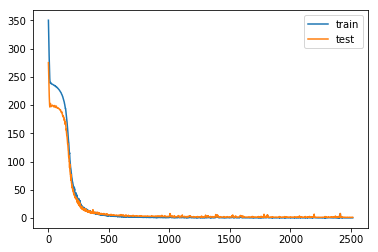

In [4]:
# Plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

('Training Set R-Square=', 0.9986949166757865)


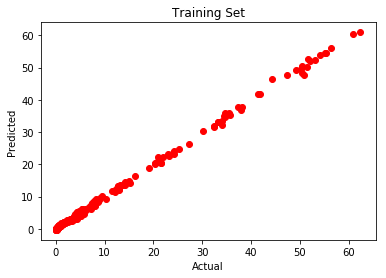

In [5]:
# Plot actual vs predition for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(Y1,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Compute R-Square value for training set
TestR2Value = r2_score(Y1,TestResults)
print("Training Set R-Square=", TestR2Value)

('Validation Set R-Square=', 0.9929288699552218)


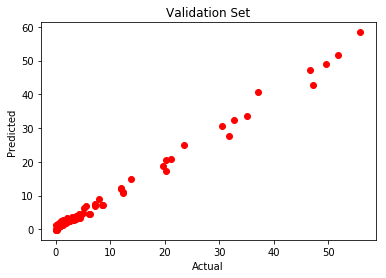

In [6]:
# Plot actual vs predition for validation set
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
plt.plot(Y2,ValResults,'ro')
plt.title('Validation Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Compute R-Square value for validation set
ValR2Value = r2_score(Y2,ValResults)
print("Validation Set R-Square=",ValR2Value)